<a href="https://colab.research.google.com/github/GustavoRSL/efc_1/blob/master/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Ademar Seide Júnior | Gustavo Reis Souza Lima

**Matricula**: 201910381 | 201910165

**Turma**: 14A

**Link Github:** https://github.com/GustavoRSL/efc_1

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 26 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [ ]:
import numpy as np
from numpy import random
import time
import matplotlib.pyplot as plt

global_1=0

# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [ ]:
def insertionSort(array):
  nComparacoes = 0
  ini= time.time()
  
  for j in range (1, len(array)):
    nComparacoes += 1
    key = array[j]
    i = j-1
    while i >= 0 and array[i] > key:
      nComparacoes += 2
      array[i+1] = array[i]
      i -= 1
    nComparacoes += 2 #ultima do while
    array[i+1] = key
  nComparacoes += 1 #ultima do for
  fim = time.time()
  tempo_exec=fim-ini
  return array,tempo_exec,nComparacoes

##  Selection Sort


In [ ]:
def selectionSort(array):
  ini= time.time()
  nComparacoes = 0
  for i in range (len(array)-1):
    nComparacoes += 1
    minIndex = i
    for j in range (i+1, len(array)):
      nComparacoes += 2 #for e if
      if array[j] < array[minIndex]:
        minIndex = j
    nComparacoes += 1 #ultima do for interno
    array[i], array[minIndex] = array[minIndex], array[i]
  nComparacoes += 1 #ultima do for externo
  fim = time.time()
  tempo_exec=fim-ini
  return array,tempo_exec,nComparacoes

##  Bubble Sort


In [ ]:
def bubbleSort(array):
  ini= time.time()
  nComparacoes = 0

  for i in range(0, len(array)-1):
    isSwapped = False
    nComparacoes += 1
    for j in range(0, len(array)-1-i):
      nComparacoes += 2 #for e if
      if array[j] > array[j+1]:
        array[j], array[j+1] = array[j+1], array[j]
        isSwapped = True
    if not isSwapped:
      break
    nComparacoes += 1 #ultima do for interno
  nComparacoes += 1 #ultima do for externo
  fim = time.time()
  tempo_exec=fim-ini
  return array,tempo_exec,nComparacoes

##  Merge Sort


In [ ]:
def merge(arr, p, q, r):
    n1 = q - p + 1
    n2 = r - q
 
    esq = [0] * (n1)
    dir = [0] * (n2)
    nComparacoes = 0

    for i in range(0, n1):
        nComparacoes += 1
        esq[i] = arr[p + i]

    nComparacoes += 1 #ultima do for

    for j in range(0, n2):
        nComparacoes += 1
        dir[j] = arr[q + 1 + j]
    
    nComparacoes += 1 #ultima do for
    i = 0   
    j = 0   
    k = p   


    while i < n1 and j < n2:
        nComparacoes += 2 # 2 do while + 1 do if
        if esq[i] <= dir[j]:
            arr[k] = esq[i]
            i += 1
        else:
            arr[k] = dir[j]
            j += 1
        k += 1
    
    nComparacoes += 2 #ultima do while

    while i < n1:
        nComparacoes += 1
        arr[k] = esq[i]
        i += 1
        k += 1
    nComparacoes += 1 #ultima do while

    while j < n2:
        nComparacoes += 1
        arr[k] = dir[j]
        j += 1
        k += 1
    nComparacoes += 1 #ultima do while
    return nComparacoes
 
def mergeSort(arr, p, r):
  ini= time.time()
  nComparacoes = 0
  teste = 0
  if p < r:
      q = p+(r-p)//2
      contador = mergeSort(arr, p, q)
      nComparacoes += contador[2]
      contador == mergeSort(arr, q+1, r)
      nComparacoes += contador[2]
      nComparacoes += merge(arr, p, q, r)
  fim = time.time()
  tempo_exec=fim-ini
  return array,tempo_exec,nComparacoes 

## Quick Sort

In [ ]:
def partition(array, inicio, fim):
  pivot = array[fim] #último elemento como pivo
  index = inicio 
  nComparacoes = 0

  for i in range(inicio, len(array)):
    nComparacoes += 2 #for e if
    if array[i] < pivot:
        array[i], array[index] = array[index], array[i]
        index += 1
  array[index], array[fim] = array[fim], array[index]

  nComparacoes += 1 #Ultima do for
  return index,nComparacoes

def quickSort(array, inicio, fim):
  ini= time.time()
  nComparacoes = 0

  if inicio >= fim:
    return 0, 0, 0
  else:
    auxIndex = partition(array, inicio, fim)
    index = auxIndex[0]
    nComparacoes += auxIndex[1]
    auxComparacoes = quickSort(array, inicio, index - 1)
    nComparacoes += auxComparacoes[2]
    auxComparacoes = quickSort(array, index + 1, fim)
    nComparacoes += auxComparacoes[2]
    final = time.time()
    tempo_exec=final-ini
    return array,tempo_exec,nComparacoes

## Heap Sort

In [ ]:
def heapify(array, index, tamanho):
  nComparacoes = 0
  maior = index
  esq = 2*index + 1
  dir = 2*index + 2

  nComparacoes += 1
  if esq < tamanho and array[index] < array[esq]:
    maior = esq
  else:
    maior = index
  nComparacoes += 1
  if dir < tamanho and array[maior] < array[dir]:
    maior = dir
  nComparacoes += 1
  if maior != index:
    array[index],array[maior] = array[maior],array[index]
    heapify(array, maior, tamanho)  
  return nComparacoes

def buildMaxHeap(array):
  nComparacoes = 0
  tamanho = int((len(array)/2)-1)
  for i in range(tamanho,-1,-1):
    nComparacoes += 1
    nComparacoes += heapify(array,i, len(array))
  
  nComparacoes += 1 #Ultima do for
  return nComparacoes

def heapSort(array):
  ini= time.time()
  quant_elementos = len(array)
  nComparacoes = 0
  nComparacoes += buildMaxHeap(array)

  for i in range(quant_elementos-1,0,-1):
    array[i], array[0] = array[0], array[i]
    nComparacoes += 1
    nComparacoes += heapify(array, 0, i)

  nComparacoes += 1 #Ultima do for
  fim = time.time()
  tempo_exec=fim-ini
  return array,tempo_exec,nComparacoes

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). **Conte o numero de comparações realizadas para cada uma das execuções.**

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



In [ ]:
print("Boa sorte!!!")

Boa sorte!!!


#Métodos Auxiliares

##Gera Array em ordem crescente

In [ ]:
# Gera array crescente
def gera_arranjos_crescente(n_elementos):
  array = np.arange(n_elementos)
  return array

##Gera array em ordem decrescente


In [ ]:
# Gera array decrescente
def gera_arranjos_decrescente(n_elementos):
  array = np.arange((n_elementos-1), -1,-1)
  return array


##Gera array randômico

In [ ]:
# Gera array ramdomico
def gera_arranjos_aleatorio(n_elementos):
  array = np.random.randint(0, 1000, (n_elementos))
  return array


##Gera melhor caso QuickSort (Com pivô no último elemento)



In [ ]:
# Gera array randômico balanceado com base no algoritmo de max-heapify
# e com elemento final (pivo) como termo médio
def heapify(array, index, tamanho):
  maior = index
  esq = 2*index + 1
  dir = 2*index + 2
  if esq < tamanho and array[index] < array[esq]:
    maior = esq
  else:
    maior = index
  if dir < tamanho and array[maior] < array[dir]:
    maior = dir
  if maior != index:
    array[index],array[maior] = array[maior],array[index]
    heapify(array, maior, tamanho)  

def buildMaxHeap(array):
  tamanho = int((len(array)/2)-1)
  for i in range(tamanho,-1,-1):
    heapify(array,i, len(array))
    
def gera_melhor_caso_quick(n_elementos):
  array = np.arange(n_elementos-1)
  somatorioTermos = np.sum(array)
  termoMedio = somatorioTermos/len(array)
  buildMaxHeap(array)
  arrayRetorno = np.append(array,[termoMedio])

  return arrayRetorno

## Gera array plotar

In [ ]:
# Gera array de elementos para plotar
n_elementos = np.array([i for i in range(5, 1000, 5)])
n_elementosQ = np.array([i for i in range(5, 970, 5)])

## Gerar array elementos iguais


In [ ]:
def gera_arranjos_iguais(n_elementos):
  array = list()
  for i in range(n_elementos):
    array.append(10)
  return array

# 1- A) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores A para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realizadas para cada uma das execuções.


##Insertion Sort

> Melhor Caso: Array ordenado de forma crescente

> Pior Caso: Array ordenado de forma decrescente

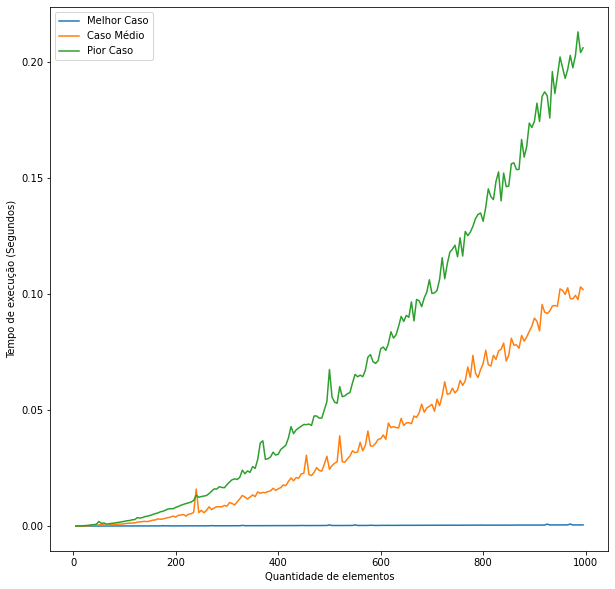

In [ ]:
melhorInsertion = list()
medioInsertion = list()
piorInsertion = list()

melhorInsertionTime = list()
medioInsertionTime = list()
piorInsertionTime = list()

melhorInsertionContador = list()
medioInsertionContador = list()
piorInsertionContador = list()

for i in range (5, 1000, 5):
  # Melhor caso -> Array crescente
  array = gera_arranjos_crescente(i)
  melhorInsertion.append(insertionSort(array))
  # Pior caso -> Array decrescente
  array= gera_arranjos_decrescente(i)
  piorInsertion.append(insertionSort(array))
  # Caso Médio -> Aleatório
  array = gera_arranjos_aleatorio(i)
  medioInsertion.append(insertionSort(array))

for i in range(len(melhorInsertion)):
  melhorInsertionTime.append(melhorInsertion[i][1])
  medioInsertionTime.append(medioInsertion[i][1])
  piorInsertionTime.append(piorInsertion[i][1])

  melhorInsertionContador.append(melhorInsertion[i][2])
  medioInsertionContador.append(medioInsertion[i][2])
  piorInsertionContador.append(piorInsertion[i][2])

plt.figure(figsize=(10, 10))
plt.plot(n_elementos, melhorInsertionTime, label = "Melhor Caso")
plt.plot(n_elementos, medioInsertionTime, label = "Caso Médio")
plt.plot(n_elementos, piorInsertionTime, label = "Pior Caso")
plt.ylabel('Tempo de execução (Segundos)')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

##Selection Sort


> Melhor e Pior caso apresentam mesma complexidade





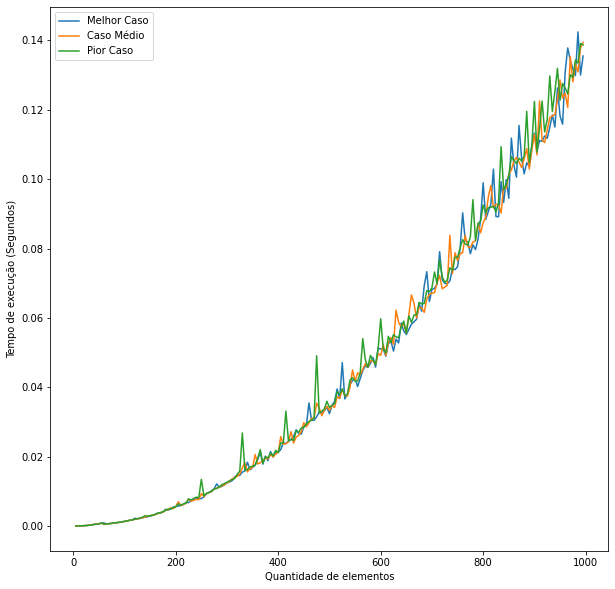

In [ ]:
melhorSelection = list()
medioSelection = list()
piorSelection = list()

melhorSelectionTime = list()
medioSelectionTime = list()
piorSelectionTime = list()

melhorSelectionContador = list()
medioSelectionContador = list()
piorSelectionContador = list()

for i in range (5, 1000, 5):
  array = gera_arranjos_crescente(i)
  melhorSelection.append(selectionSort(array))

  array= gera_arranjos_decrescente(i)
  piorSelection.append(selectionSort(array))

  array = gera_arranjos_aleatorio(i)
  medioSelection.append(selectionSort(array))

for i in range(len(melhorSelection)):
  melhorSelectionTime.append(melhorSelection[i][1])
  medioSelectionTime.append(medioSelection[i][1])
  piorSelectionTime.append(piorSelection[i][1])

  melhorSelectionContador.append(melhorSelection[i][2])
  medioSelectionContador.append(medioSelection[i][2])
  piorSelectionContador.append(piorSelection[i][2])

plt.figure(figsize=(10, 10))
plt.plot(n_elementos, melhorSelectionTime, label = "Melhor Caso")
plt.plot(n_elementos, medioSelectionTime, label = "Caso Médio")
plt.plot(n_elementos, piorSelectionTime, label = "Pior Caso")
plt.ylabel('Tempo de execução (Segundos)')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

##Bubble Sort



> Melhor caso: Array ordenado de forma crescente

> Pior caso: Array ordenado de forma decrescente







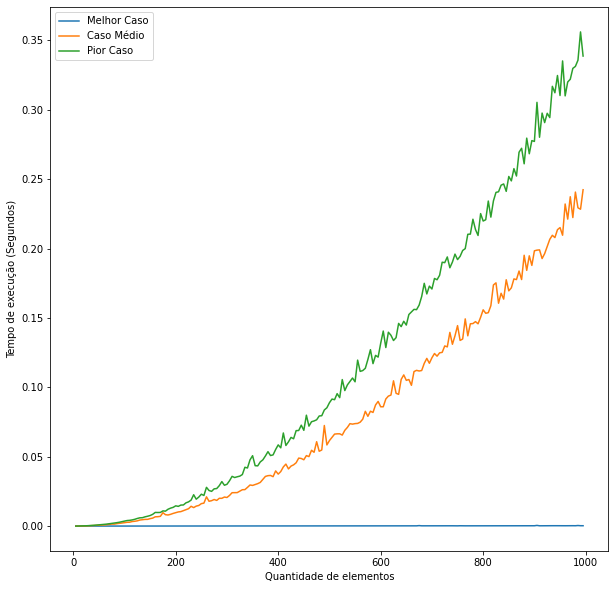

In [ ]:
melhorBubble = list()
medioBubble = list()
piorBubble = list()

melhorBubbleTime = list()
medioBubbleTime = list()
piorBubbleTime = list()

melhorBubbleContador = list()
medioBubbleContador = list()
piorBubbleContador = list()

for i in range (5, 1000, 5):
  # Melhor caso -> Array crescente
  array = gera_arranjos_crescente(i)
  melhorBubble.append(bubbleSort(array))
  # Pior caso -> Array decrescente
  array= gera_arranjos_decrescente(i)
  piorBubble.append(bubbleSort(array))
  # Caso Médio -> Aleatório
  array = gera_arranjos_aleatorio(i)
  medioBubble.append(bubbleSort(array))

for i in range(len(melhorBubble)):
  melhorBubbleTime.append(melhorBubble[i][1])
  medioBubbleTime.append(medioBubble[i][1])
  piorBubbleTime.append(piorBubble[i][1])

  melhorBubbleContador.append(melhorBubble[i][2])
  medioBubbleContador.append(medioBubble[i][2])
  piorBubbleContador.append(piorBubble[i][2])

plt.figure(figsize=(10, 10))
plt.plot(n_elementos, melhorBubbleTime, label = "Melhor Caso")
plt.plot(n_elementos, medioBubbleTime, label = "Caso Médio")
plt.plot(n_elementos, piorBubbleTime, label = "Pior Caso")
plt.ylabel('Tempo de execução (Segundos)')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

## Merge Sort
> Melhor e pior caso apresentam mesma complexidade







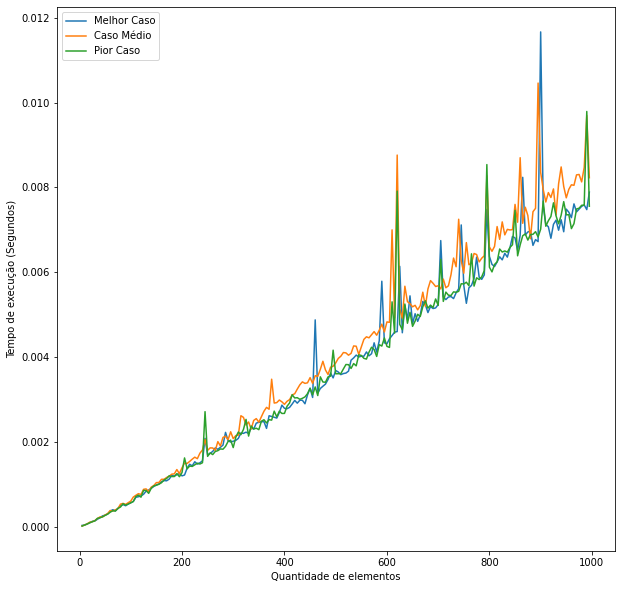

In [ ]:
melhorMerge = list()
medioMerge = list()
piorMerge = list()

melhorMergeTime = list()
medioMergeTime = list()
piorMergeTime = list()

melhorMergeContador = list()
medioMergeContador = list()
piorMergeContador = list()

for i in range (5, 1000, 5):
  # Melhor caso -> Array crescente
  array = gera_arranjos_crescente(i)
  melhorMerge.append(mergeSort(array,0,len(array)-1))
  # Pior caso -> Array decrescente
  array = gera_arranjos_decrescente(i)
  piorMerge.append(mergeSort(array,0,len(array)-1))
  # Caso Médio -> Aleatório
  array = gera_arranjos_aleatorio(i)
  medioMerge.append(mergeSort(array,0,len(array)-1))

for i in range(len(melhorMerge)):
  melhorMergeTime.append(melhorMerge[i][1])
  medioMergeTime.append(medioMerge[i][1])
  piorMergeTime.append(piorMerge[i][1])

  melhorMergeContador.append(melhorMerge[i][2])
  medioMergeContador.append(medioMerge[i][2])
  piorMergeContador.append(piorMerge[i][2])

plt.figure(figsize=(10, 10))
plt.plot(n_elementos, melhorMergeTime, label = "Melhor Caso")
plt.plot(n_elementos, medioMergeTime, label = "Caso Médio")
plt.plot(n_elementos, piorMergeTime, label = "Pior Caso")
plt.ylabel('Tempo de execução (Segundos)')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

## Heap Sort

> Melhor Caso: Todos os elementos da estrutura fossem igual. Nesse caso, para N número de nós, a remoção de cada nó do heap levaria apenas um tempo de execução constante, O(1). Não haveria necessidade de trazer nenhum nó para baixo ou trazer o nó de valor máximo para cima, pois todos os elementos são iguais. Como fazemos isso para cada nó, o número total de movimentos seria n * O(1). Portanto, o tempo de execução no melhor caso seria O(n).

> Pior Caso: Acontece quando todos os elementos da lista são diferentes. Nesse caso, precisaríamos chamar `buildMaxHeap` toda vez que removermos um elemento. Nesse caso, considerando que há N número de nós, o número de trocas para remover cada elemento seria log(n), pois essa é a altura máxima do heap Considerando que fazemos isso para cada nó, o número total de movimentos seria n * (log(n)). Portanto, o tempo de execução no pior caso será O(n(log(n)).



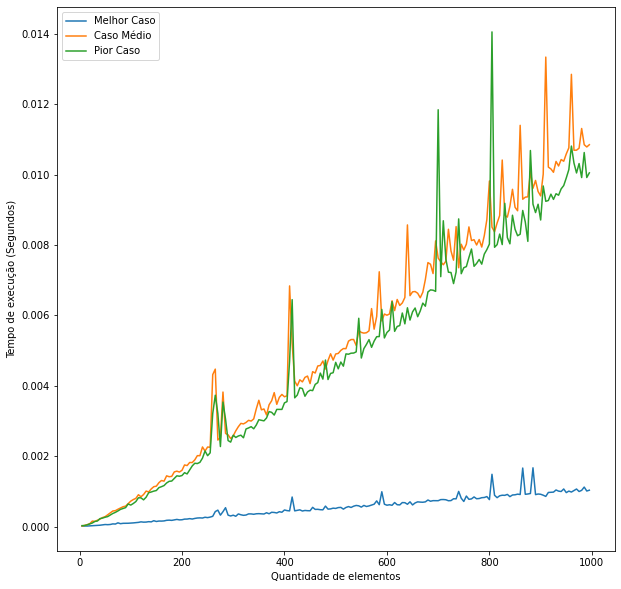

In [ ]:
melhorHeap = list()
medioHeap = list()
piorHeap = list()

melhorHeapTime = list()
medioHeapTime = list()
piorHeapTime = list()

melhorHeapContador = list()
medioHeapContador = list()
piorHeapContador = list()

for i in range (5, 1000, 5):
  # Melhor caso -> Array igual
  array = gera_arranjos_iguais(i)
  melhorHeap.append(heapSort(array))
  # Pior caso -> Array decrescente
  array = gera_arranjos_decrescente(i)
  piorHeap.append(heapSort(array))
  # Caso Médio -> Aleatório
  array = gera_arranjos_aleatorio(i)
  medioHeap.append(heapSort(array))

for i in range(len(melhorHeap)):
  melhorHeapTime.append(melhorHeap[i][1])
  medioHeapTime.append(medioHeap[i][1])
  piorHeapTime.append(piorHeap[i][1])

  melhorHeapContador.append(melhorHeap[i][2])
  medioHeapContador.append(medioHeap[i][2])
  piorHeapContador.append(piorHeap[i][2])

  
plt.figure(figsize=(10, 10))
plt.plot(n_elementos, melhorHeapTime, label = "Melhor Caso")
plt.plot(n_elementos, medioHeapTime, label = "Caso Médio")
plt.plot(n_elementos, piorHeapTime, label = "Pior Caso")
plt.ylabel('Tempo de execução (Segundos)')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

## Quick Sort



> Melhor caso: Quando os dois subarranjos gerados pelo paticionamento estão balanceados (apresentam tamanho máximo de n/2 cada).

> Pior Caso: Array ordenado e seleção do pivo pelo ultimo ou primeiro, deixando então sempre uma parte do array com 0 e a outra com n-1.





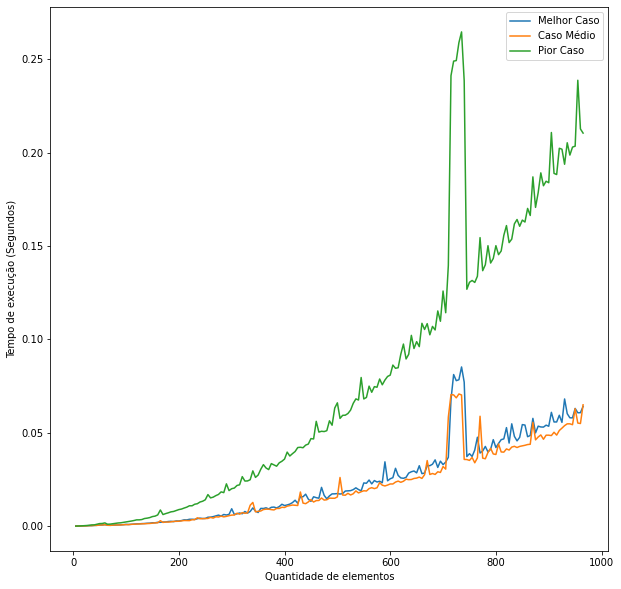

In [ ]:
melhorQuick = list()
medioQuick = list()
piorQuick = list()

melhorQuickTime = list()
medioQuickTime = list()
piorQuickTime = list()

melhorQuickContador = list()
medioQuickContador = list()
piorQuickContador = list()


#970 porque no 1000 a máquina travou
for i in range (5, 970, 5):
  # Melhor caso -> O pivot é sempre o termo médio do array
  array = gera_melhor_caso_quick(i)
  melhorQuick.append(quickSort(array,0,len(array)-1))
  # Pior caso -> Array já ordenado decrescente ou crescente
  array = gera_arranjos_decrescente(i)
  piorQuick.append(quickSort(array,0,len(array)-1))
  # Caso Médio -> Aleatório
  array = gera_arranjos_aleatorio(i)
  medioQuick.append(quickSort(array,0,len(array)-1))

for i in range(len(melhorQuick)):
  melhorQuickTime.append(melhorQuick[i][1])
  medioQuickTime.append(medioQuick[i][1])
  piorQuickTime.append(piorQuick[i][1])

  melhorQuickContador.append(melhorQuick[i][2])
  medioQuickContador.append(medioQuick[i][2])
  piorQuickContador.append(piorQuick[i][2])
  
plt.figure(figsize=(10, 10))
plt.plot(n_elementosQ, melhorQuickTime, label = "Melhor Caso")
plt.plot(n_elementosQ, medioQuickTime, label = "Caso Médio")
plt.plot(n_elementosQ, piorQuickTime, label = "Pior Caso")
plt.ylabel('Tempo de execução (Segundos)')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

## Número de Comparações

### Melhor caso

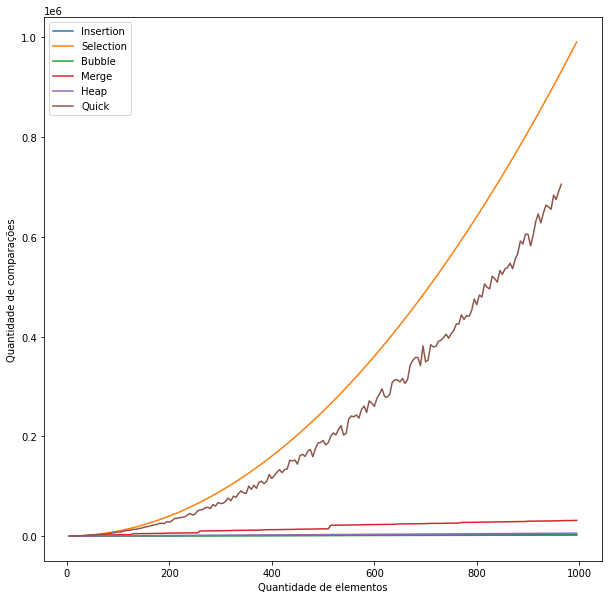

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(n_elementos, melhorInsertionContador, label = "Insertion")
plt.plot(n_elementos, melhorSelectionContador, label = "Selection")
plt.plot(n_elementos, melhorBubbleContador, label = "Bubble")
plt.plot(n_elementos, melhorMergeContador, label = "Merge")
plt.plot(n_elementos, melhorHeapContador, label = "Heap")
plt.plot(n_elementosQ, melhorQuickContador, label = "Quick")
plt.ylabel('Quantidade de comparações')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

### Caso Médio

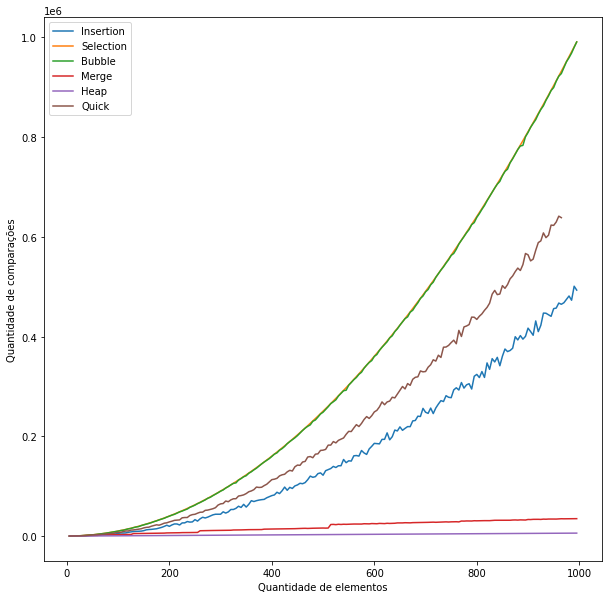

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(n_elementos, medioInsertionContador, label = "Insertion")
plt.plot(n_elementos, medioSelectionContador, label = "Selection")
plt.plot(n_elementos, medioBubbleContador, label = "Bubble")
plt.plot(n_elementos, medioMergeContador, label = "Merge")
plt.plot(n_elementos, medioHeapContador, label = "Heap")
plt.plot(n_elementosQ, medioQuickContador, label = "Quick")
plt.ylabel('Quantidade de comparações')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

### Pior caso

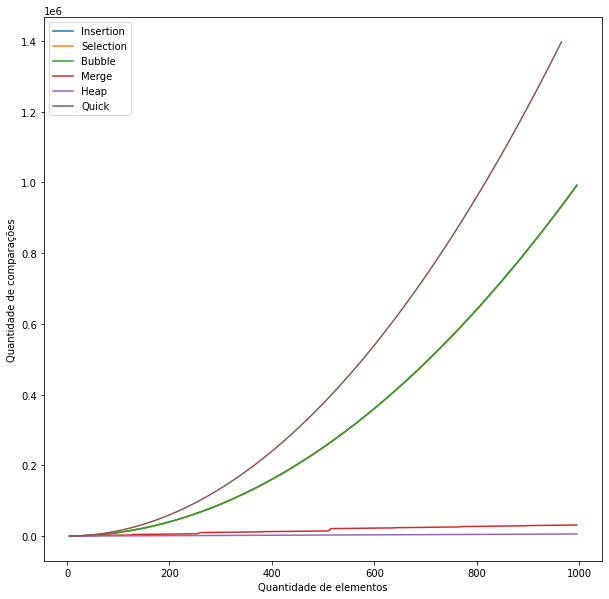

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(n_elementos, piorInsertionContador, label = "Insertion")
plt.plot(n_elementos, piorSelectionContador, label = "Selection")
plt.plot(n_elementos, piorBubbleContador, label = "Bubble")
plt.plot(n_elementos, piorMergeContador, label = "Merge")
plt.plot(n_elementos, piorHeapContador, label = "Heap")
plt.plot(n_elementosQ, piorQuickContador, label = "Quick")
plt.ylabel('Quantidade de comparações')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

#1- B) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

## Comparando Algoritmos -> Melhor caso

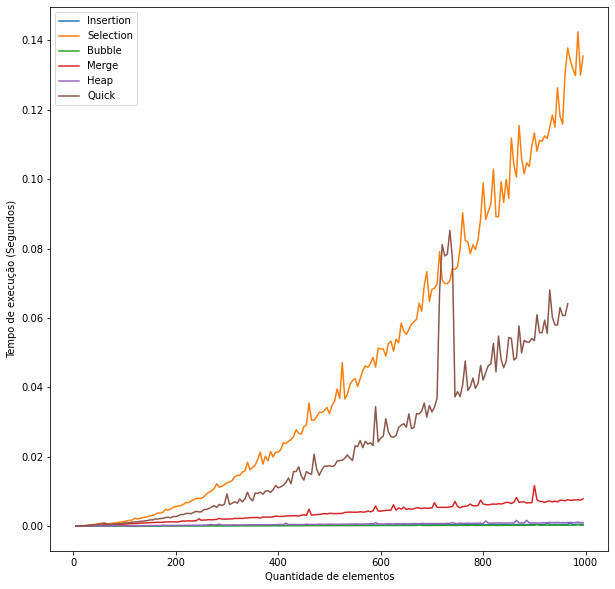

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(n_elementos, melhorInsertionTime, label = "Insertion")
plt.plot(n_elementos, melhorSelectionTime, label = "Selection")
plt.plot(n_elementos, melhorBubbleTime, label = "Bubble")
plt.plot(n_elementos, melhorMergeTime, label = "Merge")
plt.plot(n_elementos, melhorHeapTime, label = "Heap")
plt.plot(n_elementosQ, melhorQuickTime, label = "Quick")
plt.ylabel('Tempo de execução (Segundos)')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

##Comparando Algoritmos -> Pior caso

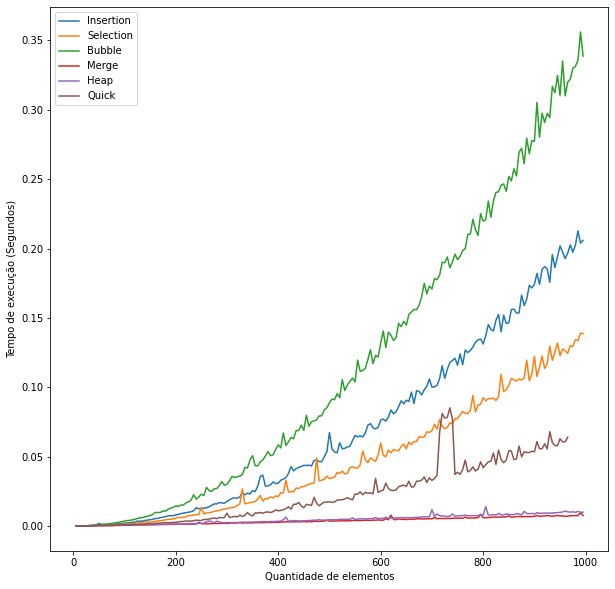

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(n_elementos, piorInsertionTime, label = "Insertion")
plt.plot(n_elementos, piorSelectionTime, label = "Selection")
plt.plot(n_elementos, piorBubbleTime, label = "Bubble")
plt.plot(n_elementos, piorMergeTime, label = "Merge")
plt.plot(n_elementos, piorHeapTime, label = "Heap")
plt.plot(n_elementosQ, melhorQuickTime, label = "Quick")
plt.ylabel('Tempo de execução (Segundos)')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

##Comparando Algoritmos -> Caso Médio

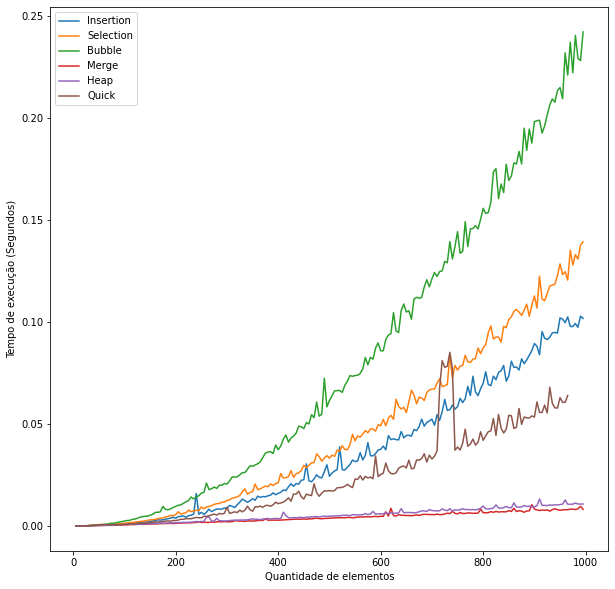

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(n_elementos, medioInsertionTime, label = "Insertion")
plt.plot(n_elementos, medioSelectionTime, label = "Selection")
plt.plot(n_elementos, medioBubbleTime, label = "Bubble")
plt.plot(n_elementos, medioMergeTime, label = "Merge")
plt.plot(n_elementos, medioHeapTime, label = "Heap")
plt.plot(n_elementosQ, melhorQuickTime, label = "Quick")
plt.ylabel('Tempo de execução (Segundos)')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

#1- C)  Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)

## Insertion Sort

> Melhor caso = $\Omega(n)$

Exp: Apenas o for irá rodar N vezes, enquanto o while reposnsável pela troca não terá seu conteúdo executado.

> Pior caso = $O(n^2)$

Exp: O for irá rodar N vezes e o while executará um somatório de vezes com base na invariante de laço, sendo assim o termo N multiplicará outro termo que varia com N, que após pegar o termo de maior relevância chega em $n^2$.

> Aleatórios = $\Theta(n^2)$


## Selection Sort

> Melhor caso = $\Omega(n^2)$

> Pior caso = $O(n^2)$

> Aleatórios = $\Theta(n^2)$

Exp: O Seletion Sort independente da ordenação do array sempre irá executar ambos os for's com base no tamanho do array, portanto N multiplicado por N, chegando ao termo de maior grau como $n^2$.





## Bubble Sort

> Melhor caso = $\Omega(n)$

> Pior caso = $O(n^2)$

> Aleatórios = $\Theta(n^2)$

Exp: O Bubble Sort no melhor caso apenas irá passar pelo primeiro for como não houve nenhuma troca ele irá terminar por considerar que o array já está ordenado.Já nos outros casos sempre irá executar ambos os for's com base no tamanho do array, portanto N multiplicado por N, chegando ao termo de maior grau como $n^2$.

## Merge Sort

> Melhor caso = $\Omega(n * log_2 n)$

> Pior caso = $O(n * log_2 n)$

> Aleatórios = $\Theta(n * log_2 n)$

Exp:

* Método Merge: $ \Theta(n) $ por conta do somátorio de n1 + n2 resultar em N e não possuir laços de repetição aninhados.

* Cada chamada do mergesort recursiva: Metade do tempo (T) do array passado: $T(n/2)$.

* Como a cada chamada recursiva é feita 2 vezes então seria $2T(n/2)$.

Assim temos que o MergeSort pode ter $\Theta(1) $ em caso do ```inicio < fim``` ou então  $2T(n/2) + \Theta(n) $ caso vá dividir o array, a cada divisão do array ele será dividido em duas partes então a sua divisão cresce em $2^n$ como o tempo vai diminuindo conforme o tamanho de n então temos o inverso portanto $ \log_2 n $, após deduzir os somátorios chegamos em:

$T(n) = 2 * \Theta(1) + n(log_2 n)$, desconsiderando tempo constante: $n(log_2 n)$.


## Quick Sort


> Melhor caso = $\Omega(n * log_2 n)$
Exp: 

Como o quick também se baseia em divisão/particionamento à medida que se divide em forma de árvore balanceada ele vai diminuindo o tempo, como o crescimento é $2^n$ o tempo é o inverso sendo $log_2 n$, a mesma regra do Merge Sort se aplica:

* Método partition: $ \Theta(n) $ por conta do for baseado no tamanho do array;

* Cada chamada recursiva: Metade do tempo (T) do array passado: $T(n/2)$;

* Como a cada chamada recursiva é feita 2 vezes então seria $2T(n/2)$;

Deduzindo no final tem-se $n * log_2 n$.

> Pior caso =  $O(n^2)$

Exp: 

No pior caso o pivo será o maior ou menor e portanto terá uma subdivisão desigual dos subarranjos, portanto ao invés de ter um tempo $T(n/2)$ nas chamadas recursivas terá $T(n-1)$, assim o tempo culminando em um somatório e multiplicando 2 termos dependentes de N, chegando em $n^2$.

> Aleatórios = $O(n * log_2 n)$

## Heap Sort


> Melhor caso = $\Omega(n)$

Exp:

Considenrando um array com todos os números iguais, a remoção de cada nó do heap levaria apenas um tempo de execução constante, O(1). Não haveria necessidade de trazer nenhum nó para baixo ou trazer o nó de valor máximo para cima, pois todos os elementos são iguais. Como fazemos isso para cada nó, o número total de movimentos seria n * O(1). Portanto, o tempo de execução no melhor caso seria O(n).

> Pior caso = $O(n * log_2 n)$

> Aleatórios = $\Theta(n * log_2 n)$

Exp: 

Por conta da invariante de laço o somatório vai sendo diminuído em função de N, como ele vai decrescendo conforme o heap ele começa a operar em $log_2 n$, como são feitas N chamadas ao método de heapify ele assume $n * {log_2 n}$.

#2) Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.

## Quick Sort Pivo Aleatório

In [ ]:
def partitionAleatorio(array, inicio, fim):
    aleatorio = random.randint(inicio, fim)
    array[fim], array[aleatorio] = array[aleatorio], array[fim]
    return partitionA(array, inicio, fim)

def partitionA(array, inicio, fim):
  pivot = array[fim] 
  index = inicio 

  for i in range(inicio, len(array)):
    if array[i] < pivot:
        array[i], array[index] = array[index], array[i]
        index += 1
  array[index], array[fim] = array[fim], array[index]

  return index

def quickSortA(array, inicio, fim):
  ini= time.time()
  if inicio >= fim:
    return
  else:
    index = partitionAleatorio(array, inicio, fim)
    quickSortA(array, inicio, index - 1)
    quickSortA(array, index + 1, fim)
    final = time.time()
    tempo_exec=final-ini
    return array,tempo_exec

## Comparação

Conclusão: A escolha de um pivô aleatório tende a evitar os piores casos do quick sort (diminuindo a probabilidade deles ocorrerem) portanto a sua execução é mais rápida.

###Comparação melhor caso

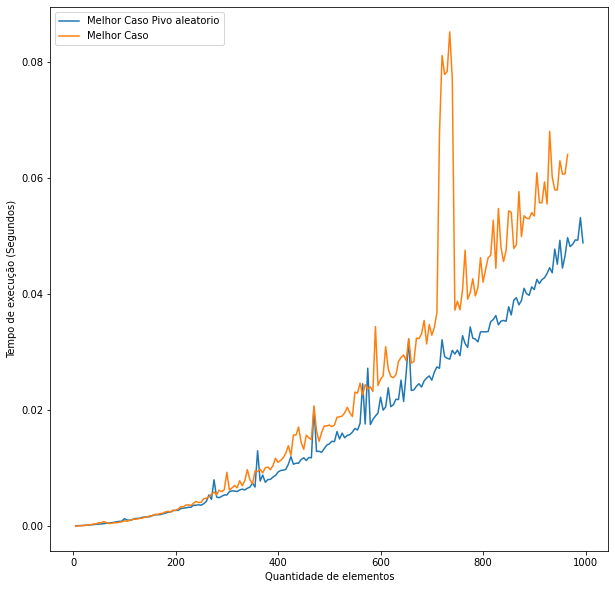

In [ ]:
## Comparação
melhorQuickA = list()
medioQuickA = list()
piorQuickA = list()

melhorQuickATime = list()
medioQuickATime = list()
piorQuickATime = list()

for i in range (5, 1000, 5):
  # Melhor caso -> array balanceado
  array = gera_melhor_caso_quick(i)
  melhorQuickA.append(quickSortA(array,0,len(array)-1))
  # Pior caso -> Array decrescente
  array = gera_arranjos_decrescente(i)
  piorQuickA.append(quickSortA(array,0,len(array)-1))
  # Caso Médio -> Aleatório
  array = gera_arranjos_aleatorio(i)
  medioQuickA.append(quickSortA(array,0,len(array)-1))

for i in range(len(melhorQuickA)):
  melhorQuickATime.append(melhorQuickA[i][1])
  medioQuickATime.append(medioQuickA[i][1])
  piorQuickATime.append(piorQuickA[i][1])

plt.figure(figsize=(10, 10))
plt.plot(n_elementos, melhorQuickATime, label = "Melhor Caso Pivo aleatorio")
plt.plot(n_elementosQ, melhorQuickTime, label = "Melhor Caso")
plt.ylabel('Tempo de execução (Segundos)')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

###Comparação pior caso

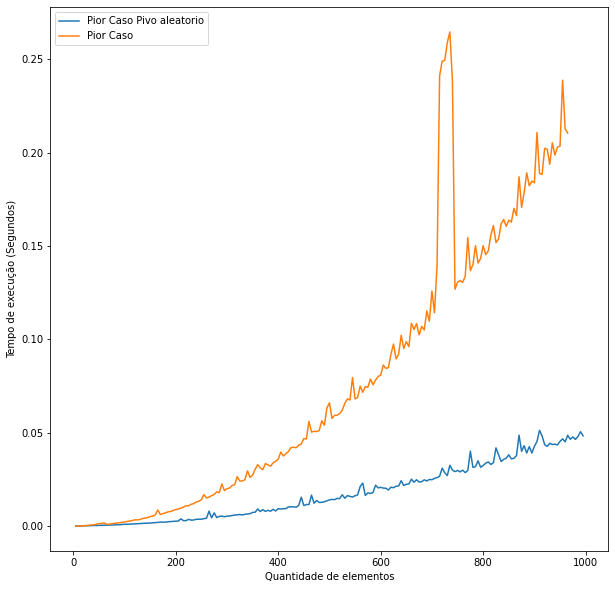

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(n_elementos, piorQuickATime, label = "Pior Caso Pivo aleatorio")
plt.plot(n_elementosQ, piorQuickTime, label = "Pior Caso")
plt.ylabel('Tempo de execução (Segundos)')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()

###Comparação caso médio

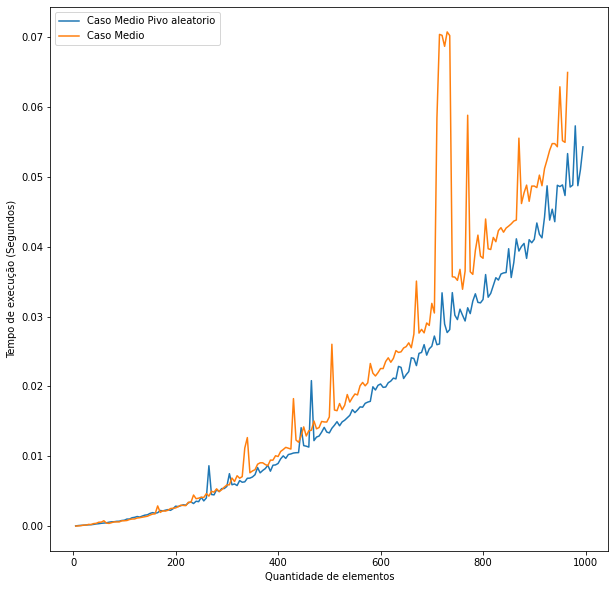

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(n_elementos, medioQuickATime, label = "Caso Medio Pivo aleatorio")
plt.plot(n_elementosQ, medioQuickTime, label = "Caso Medio")
plt.ylabel('Tempo de execução (Segundos)')
plt.xlabel('Quantidade de elementos')
plt.legend()
plt.show()